In [1]:
import pandas as pd 
import numpy as np
import unicodedata
import re

In [2]:
df = pd.read_csv("News_Dataset_9sector - News_Dataset_8sector.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     1275 non-null   object
 1   Description  1246 non-null   object
 2   Sector       1275 non-null   object
dtypes: object(3)
memory usage: 30.0+ KB


In [3]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1246 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     1246 non-null   object
 1   Description  1246 non-null   object
 2   Sector       1246 non-null   object
dtypes: object(3)
memory usage: 38.9+ KB


In [4]:
df.head()

,Headline,Description,Sector
0,M&M announces Rs 1-lakh health insurance for n...,M&M said the plan includes a health cover of R...,auto
1,Hero MotoCorp all set to enter electric segmen...,The two-wheeler maker has tied up with Taiwan-...,auto
2,Tractor sales to be hit as second Covid wave i...,"The company, which has a joint venture with Ja...",auto
3,"Hyundai extends free service, warranty period ...",The initiative has been taken in line with the...,auto
4,ITAT rules in favour of Hero MotoCorp in an in...,The tax department had questioned certain inte...,auto


In [5]:
df['Sector'].unique()

array(['auto', 'banking', 'pharma', 'consumer product', 'energy',
       'entertainment', 'telecom', 'metal', 'infrastructure'],
      dtype=object)

In [6]:
df = df.drop_duplicates() 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972 entries, 0 to 1274
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headline     972 non-null    object
 1   Description  972 non-null    object
 2   Sector       972 non-null    object
dtypes: object(3)
memory usage: 30.4+ KB


In [7]:
columns = ['Headline','Description']
X = df[columns]
X

,Headline,Description
0,M&M announces Rs 1-lakh health insurance for n...,M&M said the plan includes a health cover of R...
1,Hero MotoCorp all set to enter electric segmen...,The two-wheeler maker has tied up with Taiwan-...
2,Tractor sales to be hit as second Covid wave i...,"The company, which has a joint venture with Ja..."
3,"Hyundai extends free service, warranty period ...",The initiative has been taken in line with the...
4,ITAT rules in favour of Hero MotoCorp in an in...,The tax department had questioned certain inte...
...,...,...
1270,The long wait for light at the end of Zojila t...,"With cost overruns of INR1.45 lakh crore, one ..."
1271,FASTag makes highway journeys joyful. It is al...,"Armed with goodies, the government is aiming t..."
1272,Can Dilip Buildcon ride out the storm?,The dream run of the stock suffered a sudden j...
1273,L&T takes the road less travelled for its InvIT,"The infrastructure major, unlike its peers, is..."


In [8]:
data = df['Headline']+ " " + df['Description']
len(data)

972

In [9]:
for index, value in data.items():
    print(f"Index : {index}, Value : {value}")

Index : 0, Value : M&M announces Rs 1-lakh health insurance for new tractor customers M&M said the plan includes a health cover of Rs 1 lakh through a unique COVID-19 Mediclaim policy to cover the customer in case they contract COVID-19 with home quarantine benefits.
Index : 1, Value : Hero MotoCorp all set to enter electric segment next year The two-wheeler maker has tied up with Taiwan-based Gogoro Inc to bring the latter's battery swapping platform to India.
Index : 2, Value : Tractor sales to be hit as second Covid wave impacting rural areas: Escorts The company, which has a joint venture with Japan's Kubota, is looking at around 55 per cent growth in exports in 2021-22 with Europe serving as one of the main drivers while it plans to enter markets in South East Asia and Brazil through its partner.
Index : 3, Value : Hyundai extends free service, warranty period amid COVID-19 second wave The initiative has been taken in line with the automaker's support to customers across the count

Index : 131, Value : A biscuit-tin battery, learnings from aircraft: Tesla, now more agile, means more bumps for others The new technology halves battery cost and increases range. Tesla is adopting new processes not only to unleash an efficient battery but also make cars more maneuverable. This is bad news for auto companies that are still planning the future around internal combustion engines. The markets believe established automakers are structurally inept to leapfrog to digital and electric tech.
Index : 132, Value : Indian railways commissions Wi-Fi facility at 6,000th station Indian Railways said that it is continuing to extend the Wi-Fi facility at far-flung stations to connect the passengers and the general public with digital systems.
Index : 133, Value : Gujarat: 56 trains cancelled in view of cyclone Tauktae Three trains were cancelled on May 15, 11 on May 16, 22 on May 17, 13 on May 18, five on May 19, and one each on May 20 and 21, the WR said in a release.
Index : 134, Va

Index : 865, Value : FinMin asks PSU banks to keep high vigil on any attempt to seize funds by Cairn Cash of Indian banks lying in nations such as the US and the UK are said to be easy target for seizing and enforcing the arbitration award. To guard against such cash being taken over, the finance ministry has asked PSBs to be extra vigilant and immediately report back any attempt Cairn makes to legally attach the deposits, two sources aware of the matter said.
Index : 866, Value : NHPC carries out large-scale COVID-19 vaccination drive A total of 117 employees (between the age of 18 to 44) from MOP (ministry of power), NHPC, IREDA, PFC, NSPCL, NTPC, MNRE (ministry of new and renewable energy), NEEPCO and CEA (central electricity authority) received their first dosage of Covishield vaccine during the drive," a power ministry statement said.
Index : 867, Value : Oil marketing companies go on pause mode as petrol, diesel prices remain unchanged Accordingly, petrol price remained at previo

In [10]:
import nltk
from nltk.tokenize import word_tokenize
import re
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
# from contraction import CONTRACTION_MAP

# Implementation of lower case conversion

def lower_case_convertion(text):
    """
    Input :- string
    Output :- lowercase string
    """
    lower_text = text.lower()
    return lower_text

def lemmatization(text):
    """
    Result :- string after stemming
    Input :- String
    Output :- String
    """
    # word tokenization
    tokens = word_tokenize(text)

    for index in range(len(tokens)):
        # lemma word
        lemma_word = lemma.lemmatize(tokens[index])
        tokens[index] = lemma_word

    return ' '.join(tokens)

# initialize lemmatizer object
lemma = WordNetLemmatizer()

def remove_urls(text):
    """
    Return :- String without URLs
    input :- String
    Output :- String
    """
    url_pattern = r'https?://\S+|www\.\S+'
    without_urls = re.sub(pattern=url_pattern, repl=' ', string=text)
    return without_urls

# Removing Extra Whitespaces
def remove_extra_spaces(text):
    """
    Return :- string after removing extra whitespaces
    Input :- String
    Output :- String
    """
    space_pattern = r'\s+'
    without_space = re.sub(pattern=space_pattern, repl=" ", string=text)
    return without_space

def remove_punctuation(text):
    """
    Return :- String after removing punctuations
    Input :- String
    Output :- String
    """
    return text.translate(str.maketrans('', '', punctuation))

def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

def remove_numbers(text):
    # define the pattern to keep
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]' 
    return re.sub(pattern, '', text)


for index, value in data.items():
    d = value
    d = lower_case_convertion(d)
    d = remove_urls(d)
    d = remove_punctuation(d)
    d = remove_extra_spaces(d)
    d = remove_accented_chars(d)
    d = lemmatization(d)
    d = remove_numbers(d)
    data[index] = d
     




In [11]:
data

0       mm announces r lakh health insurance for new t...
1       hero motocorp all set to enter electric segmen...
2       tractor sale to be hit a second covid wave imp...
3       hyundai extends free service warranty period a...
4       itat rule in favour of hero motocorp in an int...
                              ...                        
1270    the long wait for light at the end of zojila t...
1271    fastag make highway journey joyful it is also ...
1272    can dilip buildcon ride out the storm the drea...
1273    lt take the road le travelled for it invit the...
1274    bharatmala head for a bumpy ride the governmen...
Length: 972, dtype: object

In [12]:
from nltk.corpus import stopwords


def remove_stopwords(text):
    """
    Return :- String after removing stopwords
    Input :- String
    Output :- String
    """
    text_without_sw = []
    # tokenization
    text_tokens = word_tokenize(text)
    for word in text_tokens:
        # checking word is stopword or not
        if word not in all_stopwords:
            text_without_sw.append(word)

    # joining all tokens after removing stop words
    without_sw = ' '.join(text_without_sw)
    return without_sw


In [13]:
# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
# all unique stop words
all_stopwords = list(set(all_stopwords))
print(f"Total number of Stopwords :- {len(all_stopwords)}")

for index, value in data.items():
    data[index] = remove_stopwords(value)
# stopword_remove_data = 

Total number of Stopwords :- 179


In [14]:
data

0       mm announces r lakh health insurance new tract...
1       hero motocorp set enter electric segment next ...
2       tractor sale hit second covid wave impacting r...
3       hyundai extends free service warranty period a...
4       itat rule favour hero motocorp inter group tra...
                              ...                        
1270    long wait light end zojila tunnel donaTMt blam...
1271    fastag make highway journey joyful also turnin...
1272    dilip buildcon ride storm dream run stock suff...
1273    lt take road le travelled invit infrastructure...
1274    bharatmala head bumpy ride government showpiec...
Length: 972, dtype: object

In [15]:
str(data[1])

'hero motocorp set enter electric segment next year twowheeler maker ha tied taiwanbased gogoro inc bring latter battery swapping platform india'

In [16]:
Y = df['Sector']

In [17]:
import nltk
nltk.download('stopwords')
import pickle
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Iamse\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import re

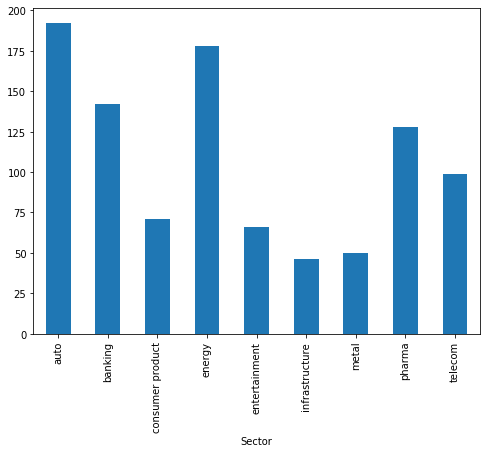

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Sector').Headline.count().plot.bar(ylim=0)
plt.show()

In [20]:
from io import StringIO
df['category_id'] = df['Sector'].factorize()[0]
category_id_df = df[['Sector', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Sector']].values)
df.head()


,Headline,Description,Sector,category_id
0,M&M announces Rs 1-lakh health insurance for n...,M&M said the plan includes a health cover of R...,auto,0
1,Hero MotoCorp all set to enter electric segmen...,The two-wheeler maker has tied up with Taiwan-...,auto,0
2,Tractor sales to be hit as second Covid wave i...,"The company, which has a joint venture with Ja...",auto,0
3,"Hyundai extends free service, warranty period ...",The initiative has been taken in line with the...,auto,0
4,ITAT rules in favour of Hero MotoCorp in an in...,The tax department had questioned certain inte...,auto,0


In [21]:
category_to_id

{'auto': 0,
 'banking': 1,
 'pharma': 2,
 'consumer product': 3,
 'energy': 4,
 'entertainment': 5,
 'telecom': 6,
 'metal': 7,
 'infrastructure': 8}

In [22]:
id_to_category

{0: 'auto',
 1: 'banking',
 2: 'pharma',
 3: 'consumer product',
 4: 'energy',
 5: 'entertainment',
 6: 'telecom',
 7: 'metal',
 8: 'infrastructure'}

In [23]:
df['merged'] = data

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(df.merged).toarray()
labels = df.category_id
features.shape

(972, 1352)

In [25]:
features

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.17048533,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [26]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for Product, category_id in sorted(category_to_id.items()):
    features_chi2 = chi2(features, labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    print("# '{}':".format(Product))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'auto':
  . Most correlated unigrams:
. auto
. vehicle
. airline
  . Most correlated bigrams:
. maruti suzuki
. free service
. tata motor
# 'banking':
  . Most correlated unigrams:
. loan
. rbi
. bank
  . Most correlated bigrams:
. elon musk
. bank said
. idbi bank
# 'consumer product':
  . Most correlated unigrams:
. shah
. hul
. fmcg
  . Most correlated bigrams:
. chief executive
. fourth quarter
. sanjiv mehta
# 'energy':
  . Most correlated unigrams:
. energy
. oil
. power
  . Most correlated bigrams:
. renewable energy
. diesel price
. petrol diesel
# 'entertainment':
  . Most correlated unigrams:
. music
. multiplex
. cinema
  . Most correlated bigrams:
. ott platform
. star india
. cinema hall
# 'infrastructure':
  . Most correlated unigrams:
. warehousing
. highway
. road
  . Most correlated bigrams:
. inr crore
. ha set
. business model
# 'metal':
  . Most correlated unigrams:
. mt
. insolvency
. steel
  . Most correlated bigrams:
. oxygen plant
. company said
. coal india
#

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
X_train, X_test, y_train, y_test = train_test_split(df['merged'], df['Sector'],test_size=0.15, random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [67]:
X_train_counts.shape

(826, 6872)

In [68]:
print(clf.predict(count_vect.transform(["Maruti"])))

['auto']


In [69]:
true_k = 9

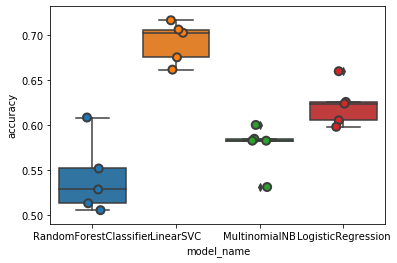

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
#     KMeans(n_clusters=9, init='k-means++', max_iter=1000, n_init=1),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [78]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.528205
1,RandomForestClassifier,1,0.512821
2,RandomForestClassifier,2,0.608247
3,RandomForestClassifier,3,0.551546
4,RandomForestClassifier,4,0.505155
5,LinearSVC,0,0.702564
6,LinearSVC,1,0.661538
7,LinearSVC,2,0.716495
8,LinearSVC,3,0.675258
9,LinearSVC,4,0.706186


In [76]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.692408
LogisticRegression        0.622443
MultinomialNB             0.576098
RandomForestClassifier    0.632741
Name: accuracy, dtype: float64

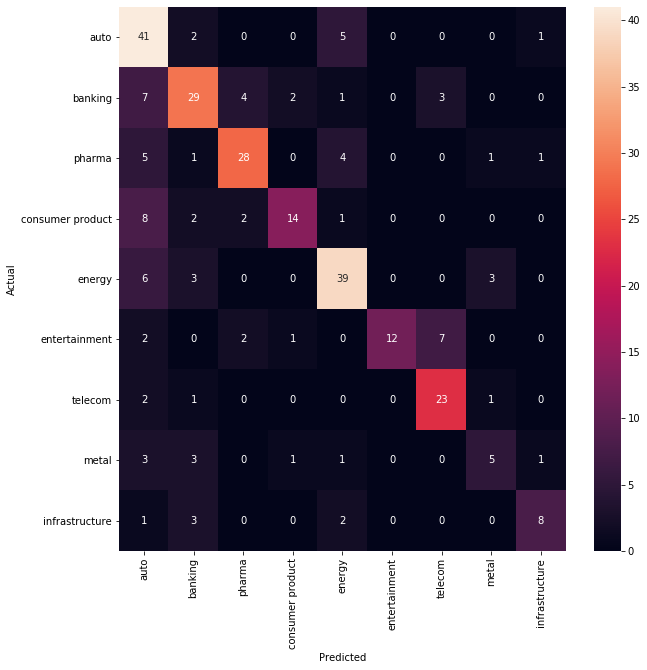

In [74]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Sector.values, yticklabels=category_id_df.Sector.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [34]:
X_test.shape

(292, 1352)

In [35]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, target_names=df['Sector'].unique()))

                  precision    recall  f1-score   support

            auto       0.55      0.84      0.66        49
         banking       0.66      0.63      0.64        46
          pharma       0.78      0.70      0.74        40
consumer product       0.78      0.52      0.62        27
          energy       0.74      0.76      0.75        51
   entertainment       1.00      0.50      0.67        24
         telecom       0.70      0.85      0.77        27
           metal       0.50      0.36      0.42        14
  infrastructure       0.73      0.57      0.64        14

        accuracy                           0.68       292
       macro avg       0.71      0.64      0.66       292
    weighted avg       0.71      0.68      0.68       292



In [36]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score

In [37]:
# len(data)

In [38]:
# vectorizer = TfidfVectorizer(stop_words='english')
# X = vectorizer.fit_transform(data[:900])
# true_k = 9
# model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
# model.fit(X_train)

# print("Top terms per cluster:")
# order_centroids = model.cluster_centers_.argsort()[:, ::-1]
# terms = vectorizer.get_feature_names()
# for i in range(true_k):
#     print("Cluster %d:" % i),
#     for ind in order_centroids[i, :10]:
#         print(' %s' % terms[ind]),
#     print

# print("\n")
# print("Prediction")

# Y = vectorizer.transform(data[900:])
# prediction = model.predict(Y)
# print(prediction)

# Y = vectorizer.transform(["My cat is hungry."])
# prediction = model.predict(Y)
# print(prediction)
 

In [39]:
import pandas as pd 
import tensorflow as tf
from tensorflow import keras
import numpy as np 
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding
import seaborn as sns
from keras.callbacks import EarlyStopping  
pd.set_option('display.max_colwidth', -1)

Using TensorFlow backend.
C:\Users\Iamse\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  from ipykernel import kernelapp as app


In [40]:
df.head()

,Headline,Description,Sector,category_id,merged
0,M&M announces Rs 1-lakh health insurance for new tractor customers,M&M said the plan includes a health cover of Rs 1 lakh through a unique COVID-19 Mediclaim policy to cover the customer in case they contract COVID-19 with home quarantine benefits.,auto,0,mm announces r lakh health insurance new tractor customer mm said plan includes health cover r lakh unique covid mediclaim policy cover customer case contract covid home quarantine benefit
1,Hero MotoCorp all set to enter electric segment next year,The two-wheeler maker has tied up with Taiwan-based Gogoro Inc to bring the latter's battery swapping platform to India.,auto,0,hero motocorp set enter electric segment next year twowheeler maker ha tied taiwanbased gogoro inc bring latter battery swapping platform india
2,Tractor sales to be hit as second Covid wave impacting rural areas: Escorts,"The company, which has a joint venture with Japan's Kubota, is looking at around 55 per cent growth in exports in 2021-22 with Europe serving as one of the main drivers while it plans to enter markets in South East Asia and Brazil through its partner.",auto,0,tractor sale hit second covid wave impacting rural area escort company ha joint venture japan kubota looking around per cent growth export europe serving one main driver plan enter market south east asia brazil partner
3,"Hyundai extends free service, warranty period amid COVID-19 second wave","The initiative has been taken in line with the automaker's support to customers across the country during these challenging times, the company said in a statement.",auto,0,hyundai extends free service warranty period amid covid second wave initiative ha taken line automaker support customer across country challenging time company said statement
4,ITAT rules in favour of Hero MotoCorp in an inter group transfer pricing case,The tax department had questioned certain inter group transactions regarding purchase of auto components within units were questioned under the transfer pricing provisions.,auto,0,itat rule favour hero motocorp inter group transfer pricing case tax department questioned certain inter group transaction regarding purchase auto component within unit questioned transfer pricing provision


In [41]:
news_neural = df[['merged','Sector']]

In [42]:
# from sklearn.utils import shuffle
# news_neural = shuffle(news_neural)
# news_neural.reset_index(inplace=True, drop=True) 

In [43]:
X,Y = df['merged'],df['Sector']

#80% to train , 10% for validation , 10% for testing
X_train, X_val, y_train, y_val = train_test_split(X,Y, test_size=0.2, random_state=42)
X_val, X_test , y_val, y_test= train_test_split(X_val,y_val, test_size=0.5, random_state=42)

In [44]:
vocab_size =20000
max_length = 150
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [45]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

X_train = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(X_train,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_train = np.asarray(y_train)
y_train = pd.get_dummies(y_train)

X_val = tokenizer.texts_to_sequences(X_val)
X_val = pad_sequences(X_val,maxlen= max_length,padding=padding_type, truncating=trunc_type)
y_val = np.asarray(y_val)
y_val = pd.get_dummies(y_val)

train_set = np.array(X_train)
val_set = np.array(X_val)

train_label = np.array(y_train)
val_label = np.array(y_val)


y_test = pd.get_dummies(y_test)
y_test = np.asarray(y_test)
y_test = np.argmax(y_test,axis=1)   #this would be our ground truth label while testing

print(train_set.shape)
print(train_label.shape)


print(val_set.shape)
print(val_label.shape)

(777, 150)
(777, 9)
(97, 150)
(97, 9)


In [46]:
path_to_glove_file =  'glove/glove.6B.100d.txt'

In [47]:

num_tokens = len(tokenizer.word_index.items()) + 2
embedding_dim = 100
hits = 0
misses = 0


embeddings_index = {}
with open(path_to_glove_file, encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))


# Prepare embedding matrix
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 5754 words (936 misses)


In [48]:
early_stop=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)


tf.keras.backend.clear_session()
embed_size = 100
model = keras.models.Sequential([
                                 
        Embedding(num_tokens,
        embedding_dim,
        embeddings_initializer=keras.initializers.Constant(embedding_matrix),
        mask_zero=True,input_shape=[None],trainable=False),
        keras.layers.Bidirectional(keras.layers.LSTM(256, dropout = 0.2)),
        keras.layers.Dense(9, activation="softmax")
            
        ])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         669200    
_________________________________________________________________
bidirectional (Bidirectional (None, 512)               731136    
_________________________________________________________________
dense (Dense)                (None, 9)                 4617      
Total params: 1,404,953
Trainable params: 735,753
Non-trainable params: 669,200
_________________________________________________________________


In [49]:
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
history = model.fit( train_set,train_label,
                     batch_size = 32,
                     steps_per_epoch=len(X_train) // 32, 
                     validation_data = (val_set , val_label),
                     validation_steps = len(val_set)//32, epochs=20,
                     callbacks=  [early_stop] )

Train on 777 samples, validate on 97 samples
Epoch 1/20
745/777 [===========================>..] - ETA: 4s - loss: 0.3505 - accuracy: 0.8913 - val_loss: 0.9382 - val_accuracy: 0.7083

In [50]:
news_neural['Sector'].unique()

array(['auto', 'banking', 'pharma', 'consumer product', 'energy',
       'entertainment', 'telecom', 'metal', 'infrastructure'],
      dtype=object)

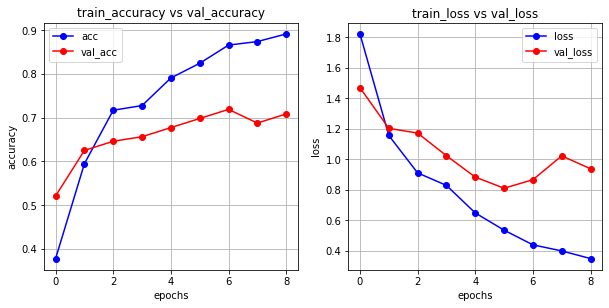

In [51]:
fig = plt.figure(figsize=(10,10))

# Plot accuracy
plt.subplot(221)
plt.plot(history.history['accuracy'],'bo-', label = "acc")
plt.plot(history.history['val_accuracy'], 'ro-', label = "val_acc")
plt.title("train_accuracy vs val_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

# Plot loss function
plt.subplot(222)
plt.plot(history.history['loss'],'bo-', label = "loss")
plt.plot(history.history['val_loss'], 'ro-', label = "val_loss")
plt.title("train_loss vs val_loss")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.grid(True)
plt.legend()

In [52]:
classes = news_neural['Sector'].value_counts().index

def prediction(inference_data):
    X = tokenizer.texts_to_sequences(inference_data)
    X = pad_sequences(X,maxlen= max_length,padding=padding_type, truncating=trunc_type)
    pred = model.predict(X)
    pred_value = tf.argmax(pred,axis =1).numpy()                
    return pred_value

              precision    recall  f1-score   support

           0       0.58      1.00      0.73        11
           1       0.67      0.62      0.65        16
           2       0.75      0.38      0.50         8
           3       0.86      0.96      0.91        26
           4       1.00      0.40      0.57         5
           5       0.33      0.67      0.44         3
           6       0.67      0.33      0.44         6
           7       1.00      0.55      0.71        11
           8       0.64      0.75      0.69        12

    accuracy                           0.71        98
   macro avg       0.72      0.63      0.63        98
weighted avg       0.76      0.71      0.70        98



Text(0.5, 1, 'Confusion matrix of News Sector Classification')

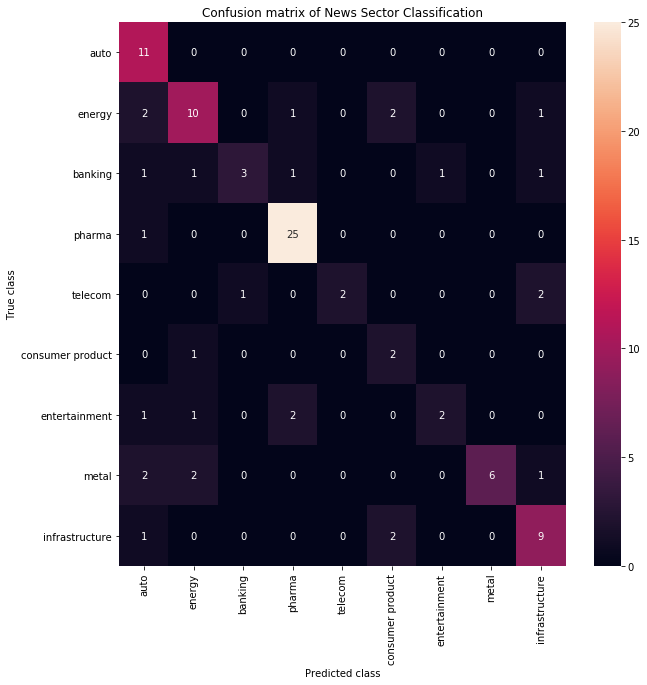

In [53]:
y_pred = prediction(X_test)
print(classification_report(np.asarray(y_test),np.asarray( y_pred)))
cf_matrix = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(10,10))
heatmap = sns.heatmap(cf_matrix, xticklabels=classes,
                      yticklabels=classes,
                      annot=True, fmt='d', color='blue')
plt.xlabel('Predicted class')
plt.ylabel('True class')
plt.title('Confusion matrix of News Sector Classification')

In [54]:
sent = pd.DataFrame({
    'News':X_test,
    'Sector':y_pred
})
sent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 1110 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   News    98 non-null     object
 1   Sector  98 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [55]:
sent

,News,Sector
1110,telecom infra operation maintenance work running smoothly amid curfew taipa association also reached centre various state address issue early leading timely action outcome r dua directorgeneral tower infrastructure provider association taipa told,8
970,billboard name universal music groupaTMs devraj sanyal international power player list recognition billboardaTMs international power player list testament apathbreaking industryleading movesa company ha making last three year universal music india said,4
992,fancode pick medium right west indie cricket board deal make fancode official fan destination india west indie cricket include international domestic cricket match caribbean,4
853,indian april fuel demand dip coronavirus wave cloud outlook consumption fuel proxy oil demand fell million tonne march data petroleum planning analysis cell ppac ministry petroleum natural gas showed tuesday,3
342,rbi opposes ibc suspension even demand bank industry grows rbi suspension ibc given good q result economic activity remaining open despite curb feel suspension show lower npa,1
...,...,...
883,tremendous response second tranche commercial coal mine auction govt many prospective bidder process registration purchase tender document auction portal coal ministry said statement,3
803,confident india driving hard bargain qatar post opec exit india ha recently asked qatar largest gas exporter world come negotiation table demanded reduce price existing longterm supply contract make lng affordable consumer,3
66,uber india business hit severely due covid second wave dara khosrowshahi uber cfo nelson chai said growth u international market would offset headwind faced india brazil,0
219,pandemic stokes demand small warehousing hub indian city despite severe space constraint spike online buying pandemic ecommerce industry ha forced scout microwarehousing hub within city ensure timely delivery shipment huge cost side story course moment company willing foot bill speed strong differentiator customer,0


In [56]:
sent['Sector'] = sent['Sector'].map(id_to_category)
sent

,News,Sector
1110,telecom infra operation maintenance work running smoothly amid curfew taipa association also reached centre various state address issue early leading timely action outcome r dua directorgeneral tower infrastructure provider association taipa told,infrastructure
970,billboard name universal music groupaTMs devraj sanyal international power player list recognition billboardaTMs international power player list testament apathbreaking industryleading movesa company ha making last three year universal music india said,energy
992,fancode pick medium right west indie cricket board deal make fancode official fan destination india west indie cricket include international domestic cricket match caribbean,energy
853,indian april fuel demand dip coronavirus wave cloud outlook consumption fuel proxy oil demand fell million tonne march data petroleum planning analysis cell ppac ministry petroleum natural gas showed tuesday,consumer product
342,rbi opposes ibc suspension even demand bank industry grows rbi suspension ibc given good q result economic activity remaining open despite curb feel suspension show lower npa,banking
...,...,...
883,tremendous response second tranche commercial coal mine auction govt many prospective bidder process registration purchase tender document auction portal coal ministry said statement,consumer product
803,confident india driving hard bargain qatar post opec exit india ha recently asked qatar largest gas exporter world come negotiation table demanded reduce price existing longterm supply contract make lng affordable consumer,consumer product
66,uber india business hit severely due covid second wave dara khosrowshahi uber cfo nelson chai said growth u international market would offset headwind faced india brazil,auto
219,pandemic stokes demand small warehousing hub indian city despite severe space constraint spike online buying pandemic ecommerce industry ha forced scout microwarehousing hub within city ensure timely delivery shipment huge cost side story course moment company willing foot bill speed strong differentiator customer,auto


In [57]:
grouped = sent.groupby("Sector")
# grouped.to_csv("test.csv")

In [58]:
i = 0
for name, group in grouped:
    print("i : {} -> {}".format(i,name))
    i+=1

i : 0 -> auto
i : 1 -> banking
i : 2 -> consumer product
i : 3 -> energy
i : 4 -> entertainment
i : 5 -> infrastructure
i : 6 -> metal
i : 7 -> pharma
i : 8 -> telecom


In [59]:
auto_news = []
for name, group in grouped:
    if(name == 'auto'):
        for row_index, row in group.iterrows():
            auto_news.append(row['News'])
            print(row['News'])

cyclone tauktae vistara indigo announce flight likely impacted vistara said flight chennai thiruvanathapuram kochi bengaluru mumbai pune goa ahmedabad might impacted till may
tractor sale april expert manufacturer expect rebound retail sale april preceding month according data crisil lockdown imposed several part country check massive surge covid infection
hero motocorp set enter electric segment next year quotwe trying launch one ev product fiscal year see multiple action whether product swap product gogoro action see next calendar yearquot hero motocorp cfo niranjan gupta said analyst call
bajaj auto extends free service period model till july acknowledge challenge customer facing due disruption caused second wave covid pandemic like last year offering extension service period two month reassure customer vehicle looked said rakesh sharma executive director bajaj auto
govts move mandate registering chip import may lead red tapism delay manufacturer government ha made import registrati

In [60]:
auto_news = pd.DataFrame({
    'Descr' : auto_news
})

In [61]:
auto_news

,Descr
0,cyclone tauktae vistara indigo announce flight likely impacted vistara said flight chennai thiruvanathapuram kochi bengaluru mumbai pune goa ahmedabad might impacted till may
1,tractor sale april expert manufacturer expect rebound retail sale april preceding month according data crisil lockdown imposed several part country check massive surge covid infection
2,hero motocorp set enter electric segment next year quotwe trying launch one ev product fiscal year see multiple action whether product swap product gogoro action see next calendar yearquot hero motocorp cfo niranjan gupta said analyst call
3,bajaj auto extends free service period model till july acknowledge challenge customer facing due disruption caused second wave covid pandemic like last year offering extension service period two month reassure customer vehicle looked said rakesh sharma executive director bajaj auto
4,govts move mandate registering chip import may lead red tapism delay manufacturer government ha made import registration compulsory range electronic integrated circuit chip import monitoring system chims august
5,nonautomotive engine business continue grow greave cotton md company nonautomotive engine business grew per cent unit march quarter previous fiscal compared unit qfy full year logged per cent growth unit financial year unit fiscal year ended march according investor presentation
6,gigeconomy rider spain must become staff within day new rule quotthe regulation approved today place u forefront technological change leave labour right behindquot labour minister yolanda diaz said
7,securing global supply chain indiauk trade deal key countering chinaaTMs might domination seven largest global shipping hub give beijing strong grip nearly every countryaTMs supply chain postpandemic world finding alternative china ha urgent need developed country indiauk freetrade agreement could first string bilateral deal
8,forced labour uyghurs xinjiang behind global supply solar panel investigation paper reveals way forced labour uyghur region pervade entire supply chain reach deep international market
9,bajaj electricals fully acquires jv firm starlite lighting consideration said relinquishment transfer joint control management right sll outgoing promoter favour company company pay aggregate control premium r crore plus gst applicable outgoing promoter subject term condition said cta said


In [62]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
      return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
      return  TextBlob(text).sentiment.polarity

In [63]:
auto_news['Subjectivity'] = auto_news['Descr'].apply(getSubjectivity)
auto_news['Polarity'] = auto_news['Descr'].apply(getPolarity)
auto_news

NameError: name 'TextBlob' is not defined

In [ ]:
plt.figure(figsize = (10,6))
auto_news['Polarity'].hist(color = 'red')

In [ ]:
plt.figure(figsize = (10,6))
auto_news['Subjectivity'].hist(color = 'green')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

auto_news['Compound'] = [sia.polarity_scores(v)['compound'] for v in auto_news['Descr']]
auto_news['Negative'] = [sia.polarity_scores(v)['neg'] for v in auto_news['Descr']]
auto_news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in auto_news['Descr']]
auto_news['Positive'] = [sia.polarity_scores(v)['pos'] for v in auto_news['Descr']]
auto_news

In [ ]:
pharma_news = []
for name, group in grouped:
    if(name == 'pharma'):
        for row_index, row in group.iterrows():
            pharma_news.append(row['News'])
#             print(row['News'])

In [ ]:
pharma_news

In [ ]:
pharma_news = pd.DataFrame({
    'Descr' : pharma_news
})

In [ ]:
pharma_news